In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('C:/Users/19012/Documents/f21-case-studies/case-2-team-3/Data/train_data.csv')
gdp_states = pd.read_csv('C:/Users/19012/Documents/f21-case-studies/case-2-team-3/Data/gdp_states.csv')

In [4]:
gdp_states.head()

,Rank,State,GSDP (Cr INR at Current prices) in 19-20,GSDP (Cr INR at Current prices) in 18-19,Share,GDP ($billion),GSDP (Cr INR at 2011-12 prices) in 19-20,GSDP (Cr INR at 2011-12 prices) in 18-19
0,1.0,Maharashtra,-,"2,632,792",13.88%,398.145,-,"2,039,074"
1,2.0,Tamil Nadu,"1,845,853","1,630,208",8.59%,246.529,"1,312,929","1,215,307"
2,3.0,Uttar Pradesh,"1,687,818","1,584,764",8.35%,239.656,"1,166,817","1,123,982"
3,4.0,Gujarat,-,"1,502,899",7.92%,227.276,-,"1,186,379"
4,5.0,Karnataka,"1,631,977","1,493,127",7.87%,225.798,"1,156,039","1,091,077"


In [5]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
train_data.shape

(252000, 13)

In [7]:
print(gdp_states['State'].unique())
print(train_data['STATE'].unique())

['Maharashtra' 'Tamil Nadu' 'Uttar Pradesh' 'Gujarat' 'Karnataka'
 'West Bengal' 'Rajasthan' 'Andhra Pradesh' 'Telangana' 'Madhya Pradesh'
 'Kerala' 'Delhi' 'Haryana' 'Bihar' 'Punjab' 'Odisha' 'Assam'
 'Chhattisgarh' 'Jharkhand' 'Uttarakhand' 'Jammu & Kashmir'
 'Himachal Pradesh' 'Goa' 'Tripura' 'Chandigarh' 'Puducherry' 'Meghalaya'
 'Sikkim' 'Manipur' 'Nagaland' 'Arunachal Pradesh' 'Mizoram'
 'Andaman & Nicobar Islands' 'India']
['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']


In [20]:
gdp_states['State'].nunique()

34

in `train_data`, the spaces are `_` and one state has a number in brackets. Thus, these need to be cleaned.

In [8]:
train_data['STATE'] = train_data['STATE'].replace('_', ' ', regex=True)

In [9]:
# remove anything of the form [%]
train_data['STATE'] = train_data.STATE.replace('\[\d\]', '', regex=True)

In [10]:
#train_data.join(gdp_states, on=['STATE', 'State'])
df = pd.merge(train_data, gdp_states, left_on='STATE',
         right_on='State',
        how='left')

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,CURRENT_HOUSE_YRS,Risk_Flag,Rank,State,GSDP (Cr INR at Current prices) in 19-20,GSDP (Cr INR at Current prices) in 18-19,Share,GDP ($billion),GSDP (Cr INR at 2011-12 prices) in 19-20,GSDP (Cr INR at 2011-12 prices) in 18-19
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,...,13,0,10.0,Madhya Pradesh,"906,672","809,592",4.27%,122.431,"561,801","522,009"
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,13,0,1.0,Maharashtra,-,"2,632,792",13.88%,398.145,-,"2,039,074"
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,10,0,11.0,Kerala,-,"781,653",4.12%,118.206,-,"559,412"
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,12,1,16.0,Odisha,"521,275","487,805",2.57%,73.768,"396,499","376,877"
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil Nadu,...,14,1,2.0,Tamil Nadu,"1,845,853","1,630,208",8.59%,246.529,"1,312,929","1,215,307"


In [11]:
df['GDP ($billion)'] = df['GDP ($billion)'].astype('float')

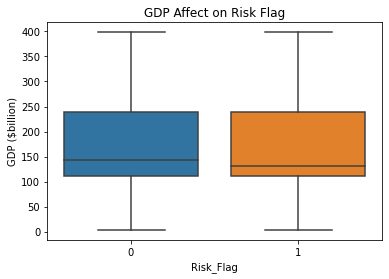

In [12]:
sns.boxplot(x="Risk_Flag", y="GDP ($billion)", data=df).set_title('GDP Affect on Risk Flag');

looks like GDP does not affect someones ability to pay a loan

In [13]:
df['Share'] = df['Share'].replace('%', '', regex=True)

In [14]:
df['Share'] = df['Share'].astype('float')

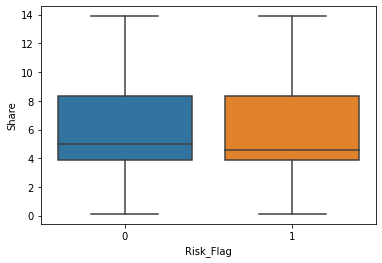

In [15]:
sns.boxplot(x="Risk_Flag", y="Share", data=df);

In [16]:
df.corr()[['Risk_Flag', 'Share']].loc[['Risk_Flag', 'Share']]

,Risk_Flag,Share
Risk_Flag,1.000000,-0.020007
Share,-0.020007,1.000000


In [17]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Rank,Share,GDP ($billion)
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153,0.001493,-0.001686,-0.001685
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091,-0.006884,0.001880,0.001866
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809,-0.016519,0.013531,0.013531
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523,-0.001970,-0.001529,-0.001519
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942,-0.010785,0.008639,0.008643
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375,0.007897,-0.011929,-0.011911
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000,0.017125,-0.020007,-0.020021
Rank,0.001493,-0.006884,-0.016519,-0.001970,-0.010785,0.007897,0.017125,1.000000,-0.875177,-0.875236
Share,-0.001686,0.001880,0.013531,-0.001529,0.008639,-0.011929,-0.020007,-0.875177,1.000000,1.000000
GDP ($billion),-0.001685,0.001866,0.013531,-0.001519,0.008643,-0.011911,-0.020021,-0.875236,1.000000,1.000000


In [19]:
data_columns = list(gdp_states.columns)
#print(data.Income.dtype)
data_types = [gdp_states[i].dtype for i in data_columns]

d = {'data_columns': data_columns, 'data_types': data_types}
df = pd.DataFrame(data=d)
df

,data_columns,data_types
0,Rank,float64
1,State,object
2,GSDP (Cr INR at Current prices) in 19-20,object
3,GSDP (Cr INR at Current prices) in 18-19,object
4,Share,object
5,GDP ($billion),object
6,GSDP (Cr INR at 2011-12 prices) in 19-20,object
7,GSDP (Cr INR at 2011-12 prices) in 18-19,object
